In [57]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

### For Colab

In [58]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# # TODO: Enter the foldername in your Drive where you have saved the unzipped
# # assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = 'PyTorch Test Project/N_TXT'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# # %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# # !bash get_datasets.sh
# # %cd /content/drive/My\ Drive/$FOLDERNAME

In [59]:
# path = "/content/drive/MyDrive/PyTorch Test Project/N_TXT"

# os.chdir(path)

# fx_data = np.array([], dtype=np.float32)

# #gets data from file specified by file_path
# def get_contents(file_path):
#     global fx_data
#     skip_lines = 7

#     with open(file_path,'r') as file:

#         for skips in range(skip_lines):
#             next(file)

#         lines = file.readlines()[:-1]

#         for line in lines:
#             data = line.split()[-1]
#             fx_data = np.append(fx_data, np.float32(data))
#             #print(data)

In [60]:
path = "C:\\Users\Admin\\.vscode\\PyTorch\\Time Series Prediction\\N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [61]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        
        # if (re.match("/Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt", file_path) or
        #     re.match("/Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt", file_path)):
        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/10Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/11Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/1Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/2Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/3Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/4Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/5Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/6Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/7Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/8Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_

dtype('float32')

In [62]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [63]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,17.0
1,1.0,17.0
2,2.0,17.0
3,3.0,17.0
4,4.0,17.0
...,...,...
187855,187855.0,1.3
187856,187856.0,1.3
187857,187857.0,1.3
187858,187858.0,1.3


([<matplotlib.lines.Line2D at 0x21cea339c10>], pandas.core.frame.DataFrame)

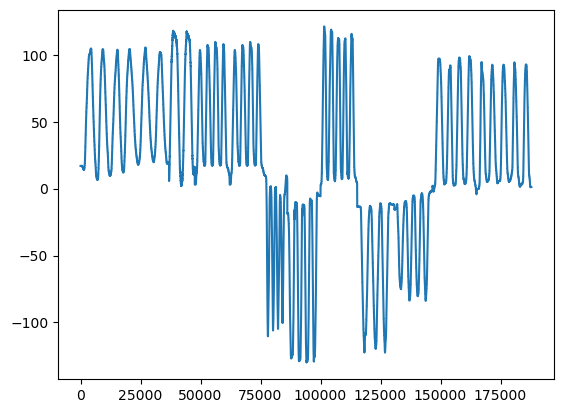

In [64]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [65]:
from copy import deepcopy as dc

def lstm_dataframe(df, n_steps):
    df = dc(df)
    
    # df.set_index("FX Channel")

    for i in range(1, n_steps+1):
        df[f'Time(t-{i})'] = df['Time'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

n_steps = 7
shifted_df = lstm_dataframe(dataset, n_steps)

shifted_df, shifted_df.shape

(            Time  FX Channel  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7            7.0        17.0        6.0        5.0        4.0        3.0   
 8            8.0        17.0        7.0        6.0        5.0        4.0   
 9            9.0        17.0        8.0        7.0        6.0        5.0   
 10          10.0        17.0        9.0        8.0        7.0        6.0   
 11          11.0        17.0       10.0        9.0        8.0        7.0   
 ...          ...         ...        ...        ...        ...        ...   
 187855  187855.0         1.3   187854.0   187853.0   187852.0   187851.0   
 187856  187856.0         1.3   187855.0   187854.0   187853.0   187852.0   
 187857  187857.0         1.3   187856.0   187855.0   187854.0   187853.0   
 187858  187858.0         1.3   187857.0   187856.0   187855.0   187854.0   
 187859  187859.0         1.3   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [66]:
columnsTitles = ['FX Channel', 'Time']

for i in range(n_steps+1):
    columnsTitles.append(f"Time(t-{i})")

shifted_df = shifted_df.reindex(columns=columnsTitles)
shifted_df = shifted_df.drop(columns=["Time(t-0)"])

shifted_df, type(columnsTitles), len(columnsTitles), shifted_df.shape

(        FX Channel      Time  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7             17.0       7.0        6.0        5.0        4.0        3.0   
 8             17.0       8.0        7.0        6.0        5.0        4.0   
 9             17.0       9.0        8.0        7.0        6.0        5.0   
 10            17.0      10.0        9.0        8.0        7.0        6.0   
 11            17.0      11.0       10.0        9.0        8.0        7.0   
 ...            ...       ...        ...        ...        ...        ...   
 187855         1.3  187855.0   187854.0   187853.0   187852.0   187851.0   
 187856         1.3  187856.0   187855.0   187854.0   187853.0   187852.0   
 187857         1.3  187857.0   187856.0   187855.0   187854.0   187853.0   
 187858         1.3  187858.0   187857.0   187856.0   187855.0   187854.0   
 187859         1.3  187859.0   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [67]:
dataset = shifted_df.to_numpy()

dataset.shape, dataset

((187853, 9),
 array([[1.70000e+01, 7.00000e+00, 6.00000e+00, ..., 2.00000e+00,
         1.00000e+00, 0.00000e+00],
        [1.70000e+01, 8.00000e+00, 7.00000e+00, ..., 3.00000e+00,
         2.00000e+00, 1.00000e+00],
        [1.70000e+01, 9.00000e+00, 8.00000e+00, ..., 4.00000e+00,
         3.00000e+00, 2.00000e+00],
        ...,
        [1.30000e+00, 1.87857e+05, 1.87856e+05, ..., 1.87852e+05,
         1.87851e+05, 1.87850e+05],
        [1.30000e+00, 1.87858e+05, 1.87857e+05, ..., 1.87853e+05,
         1.87852e+05, 1.87851e+05],
        [1.30000e+00, 1.87859e+05, 1.87858e+05, ..., 1.87854e+05,
         1.87853e+05, 1.87852e+05]], dtype=float32))

In [68]:
X = dataset[:, 1:]
y = dataset[:, 0]

X.shape, y.shape, y[0], X[0]

((187853, 8),
 (187853,),
 17.0,
 array([7., 6., 5., 4., 3., 2., 1., 0.], dtype=float32))

In [69]:
X = dc(np.flip(X, axis=1))
X

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.00000e+00,
        6.00000e+00, 7.00000e+00],
       [1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 6.00000e+00,
        7.00000e+00, 8.00000e+00],
       [2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 7.00000e+00,
        8.00000e+00, 9.00000e+00],
       ...,
       [1.87850e+05, 1.87851e+05, 1.87852e+05, ..., 1.87855e+05,
        1.87856e+05, 1.87857e+05],
       [1.87851e+05, 1.87852e+05, 1.87853e+05, ..., 1.87856e+05,
        1.87857e+05, 1.87858e+05],
       [1.87852e+05, 1.87853e+05, 1.87854e+05, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05]], dtype=float32)

In [70]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

X_train = X[:split_idx]
X_test = X[split_idx:]

y_train = y[:split_idx]
y_test = y[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150282, 8), (37571, 8), (150282,), (37571,))

In [71]:
# X_train = torch.tensor(X_train).float()
# y_train = torch.tensor(y_train).float()
# X_test = torch.tensor(X_test).float()
# y_test = torch.tensor(y_test).float()

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

X_train.shape, y_train.shape

((150282, 8), (150282, 1))

In [73]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8]),
 torch.Size([37571, 8]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [74]:
type(X_train)

torch.Tensor

In [75]:
X_train = X_train.unsqueeze(dim = 2)
X_test = X_test.unsqueeze(dim = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [76]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'cpu'

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [78]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [79]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 64

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True,
                              drop_last=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False,
                              drop_last=True)

#check out what we've created
print(f"Dataloaders: {train_loader, test_loader}")
print(f"Length of train_dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of train_dataloader: {len(test_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000021CEA37B190>, <torch.utils.data.dataloader.DataLoader object at 0x0000021CEA30AA50>)
Length of train_dataloader: 2348 batches of 64
Length of train_dataloader: 587 batches of 64


In [80]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([64, 8, 1]) torch.Size([64, 1])


In [81]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

'cpu'

In [106]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True, dropout=0.05)
        
        self.fc = nn.Linear(hidden_size, 1, bias=True)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        # print(out.shape)
        return out

model = LSTM(1, 8, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [107]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    train_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0

    global train_acc
    train_acc = np.append(train_acc, train_loss/len(train_loader))
    print()

In [108]:
def validate_one_epoch():
    model.eval()
    running_loss = 0.0
    test_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.inference_mode():
            output = model(x_batch)
            print(f"{x_batch.shape}")
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            test_loss += loss.item()
                

    avg_loss_across_batches = running_loss / len(test_loader)
    global test_acc
    test_acc = np.append(test_acc, avg_loss_across_batches)

    test_loss = 0.0
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [109]:
learning_rate = 0.01
num_epochs = 5

loss_function = nn.L1Loss()
# optimizer = torch.optim.Adam(model.parameters(), 
#                              lr=learning_rate, 
#                              weight_decay=1e-5)

optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate
                            )

train_acc = np.array([])
test_acc = np.array([])

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.219
Batch 200, Loss: 0.167
Batch 300, Loss: 0.161
Batch 400, Loss: 0.159
Batch 500, Loss: 0.158
Batch 600, Loss: 0.159
Batch 700, Loss: 0.157
Batch 800, Loss: 0.159
Batch 900, Loss: 0.157
Batch 1000, Loss: 0.155


KeyboardInterrupt: 

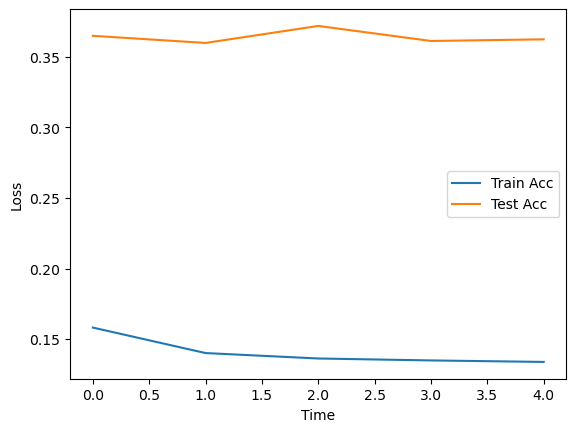

In [86]:
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Time')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:
len(X_train), X_train.shape

(150282, torch.Size([150282, 8, 1]))

In [88]:
print(model)

LSTM(
  (lstm): LSTM(1, 8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)


In [99]:
type(X_train), X_train.shape

(torch.Tensor, torch.Size([150282, 8, 1]))

torch.Size([150282, 8, 1])
[[0.55076045]
 [0.55081993]
 [0.5508793 ]
 ...
 [0.86726147]
 [0.8672713 ]
 [0.8672811 ]]


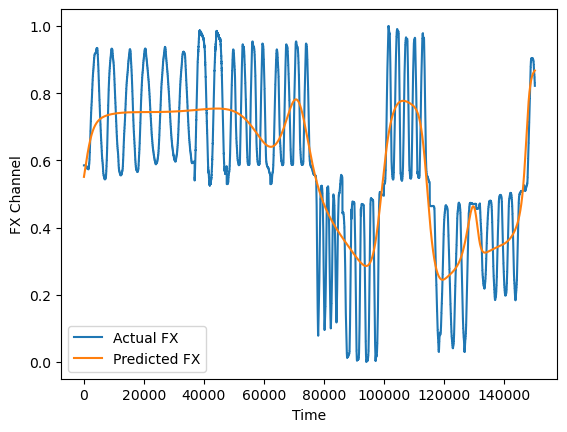

In [100]:
model.eval()
with torch.inference_mode():
    predicted = model((X_train).to(device)).to('cpu').numpy()
    
print(X_train.shape)
print(predicted)
plt.plot(y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


In [101]:
predicted

array([[0.55076045],
       [0.55081993],
       [0.5508793 ],
       ...,
       [0.86726147],
       [0.8672713 ],
       [0.8672811 ]], dtype=float32)

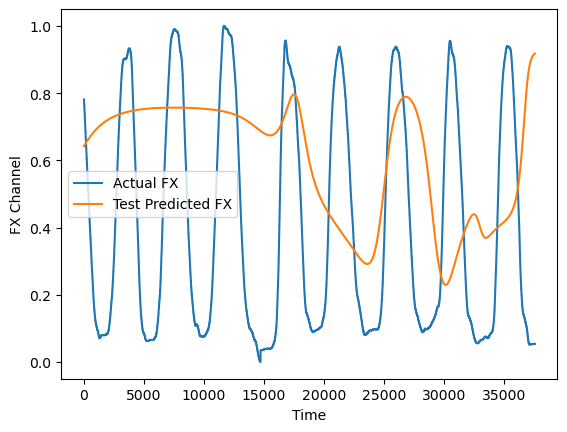

In [90]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()
    
plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [91]:
X_test.shape, X_test[0]

(torch.Size([37571, 8, 1]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [92]:
temp = torch.arange(0, 1, 0.000016)
temp = temp.unsqueeze(dim=1)
temp.shape

torch.Size([62500, 1])

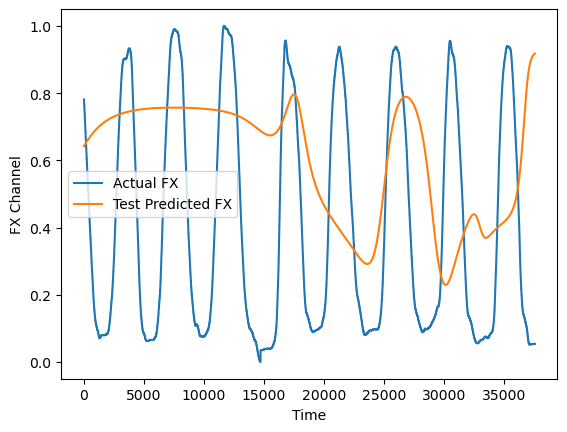

In [93]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [94]:
y_test[0], y_test[5800], y_train[0], y_train[23000]

(tensor([0.7812]), tensor([0.0658]), tensor([0.5850]), tensor([0.6347]))

In [95]:
X_test.max(), X_test.min()

(tensor(1.), tensor(0.))